In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [123]:
from sklearn.model_selection import train_test_split

In [24]:
%matplotlib notebook

In [97]:

# cгенерировать 2 набора линейноделимых данных 


X = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1], 
    
     
    [0,0,-1],
    [0,-1,0],
    [0,-1,-1],
    [-1,0,0],
    [-1,0,-1],
    [-1,-1,0],
    [-1,-1,-1],
])

X = np.where(X==-1, 2, X)
X = np.where(X==0, -1, X)

y1 =  np.array([1,1,1,1, -1,-1,-1,-1,  1,1,1,-1,-1,-1,-1])

In [99]:
rgen = np.random.RandomState(1)
X = np.zeros((20, 3))
y = np.ones(20)
X[:10, :] = 5 * rgen.random_sample((10, 3))
X[10:, :] = 5 * rgen.random_sample((10, 3)) + 5
y[10:] *= -1 


<IPython.core.display.Javascript object>


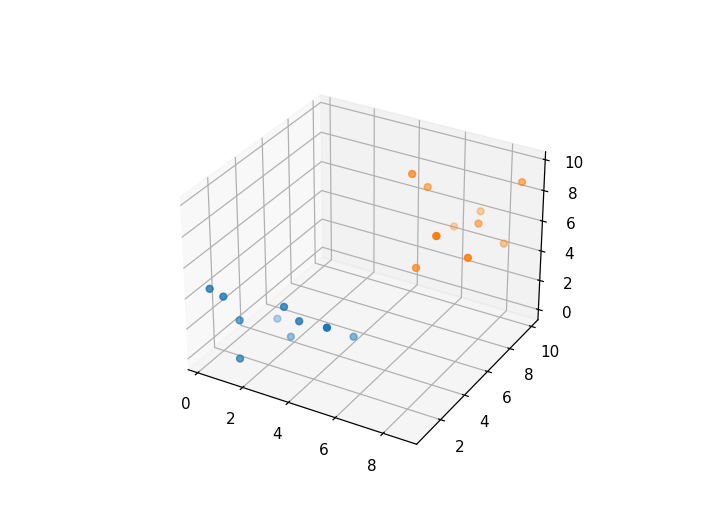

In [31]:

x1 = X[y == 1]
x2 = X[y == -1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2])
ax.scatter(x2.T[0], x2.T[1],x2.T[2])

<IPython.core.display.Javascript object>


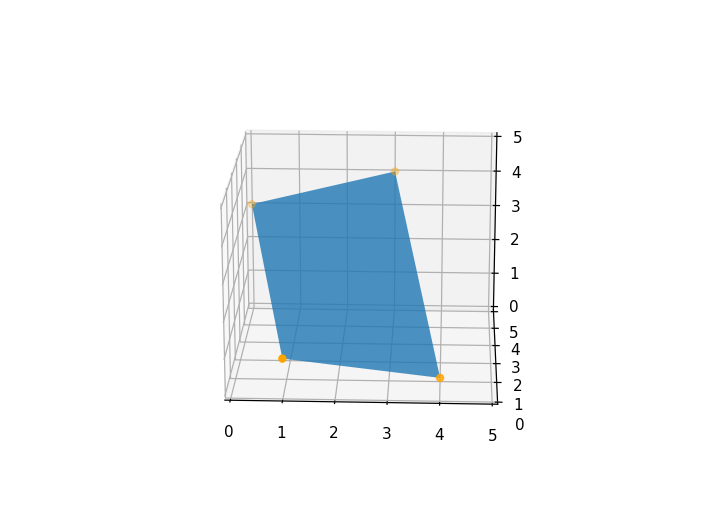

(0.0, 5.0)

In [28]:
# Посмотрели на пример из интернета
# Оч красиво, ничего не понятно
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x = [1, 0, 3, 4]

y = [0, 5, 5, 1]

z = [1, 3, 4, 0]

vertices = [list(zip(x,y,z))]

poly = Poly3DCollection(vertices, alpha=0.8)

ax.add_collection3d(poly)

ax.scatter(x, y, z, color='orange')

ax.set_xlim(0,5)

ax.set_ylim(0,5)

ax.set_zlim(0,5)    


# по предварительным оценкам:
# красиво, просто
# тяжело применимо из-за возврата данных принадлежности/непринадлежности

<IPython.core.display.Javascript object>


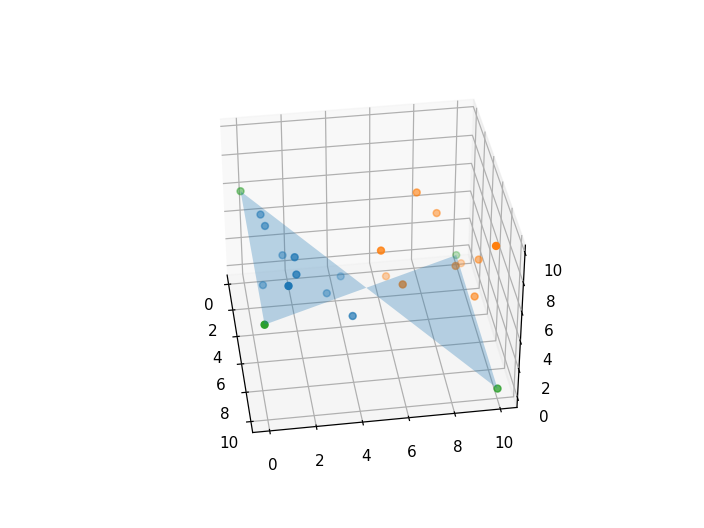

In [51]:
x1 = X[y == 1]
x2 = X[y == -1]

px = [0,10, 0, 10]
py = [10,10, 0, 0]
pz = [0,0, 6,  6]



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2])
ax.scatter(x2.T[0], x2.T[1],x2.T[2])
ax.scatter(px, py,pz)


vertices = [list(zip(px,py,pz))]
poly = Poly3DCollection(vertices, alpha=0.3)
ax.add_collection3d(poly)

# выглядит смешно

<IPython.core.display.Javascript object>


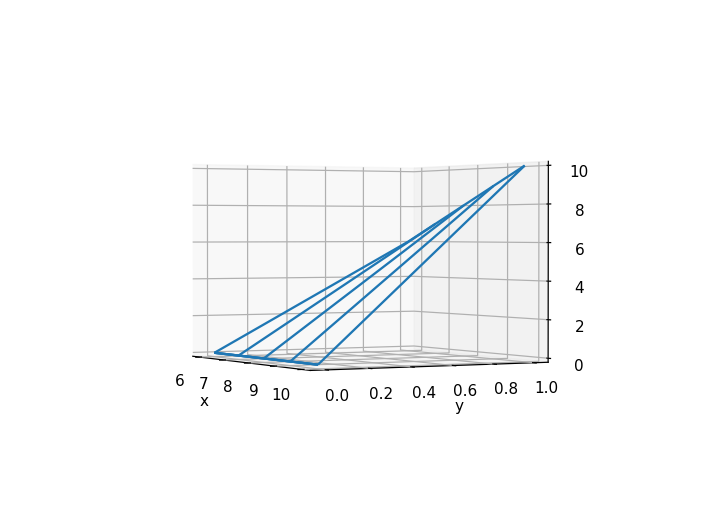

Text(0.5, 0.5, 'y')

In [95]:


u = np.array([6, 7, 8, 9, 10])
v = np.array([0, 0, 0, 1])
x, y = np.meshgrid(u, v)
#u, v = np.mgrid[0:5,6:10]
#x = u
#y = v
z =  x, y

px = np.array([0,10, 0, 10])
py = np.array([10,10, 0, 0])
pz = np.array([0,0, 6,  6])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z)
plt.xlabel('x')
plt.ylabel('y')


<IPython.core.display.Javascript object>


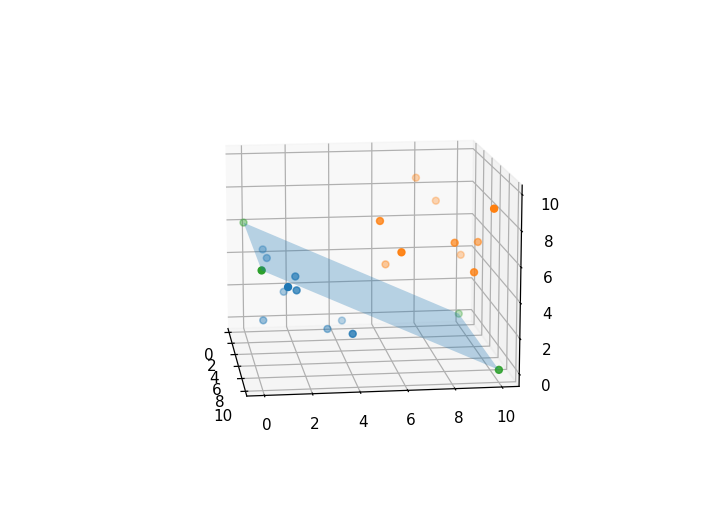

In [120]:
x1 = X[y == 1]
x2 = X[y == -1]

px = [0,10, 10, 0]
py = [10,10, 0, 0]
pz = [0,0, 6,  6]



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2])
ax.scatter(x2.T[0], x2.T[1],x2.T[2])
ax.scatter(px, py,pz)


vertices = [list(zip(px,py,pz))]
poly = Poly3DCollection(vertices, alpha=0.3)
ax.add_collection3d(poly)

<IPython.core.display.Javascript object>


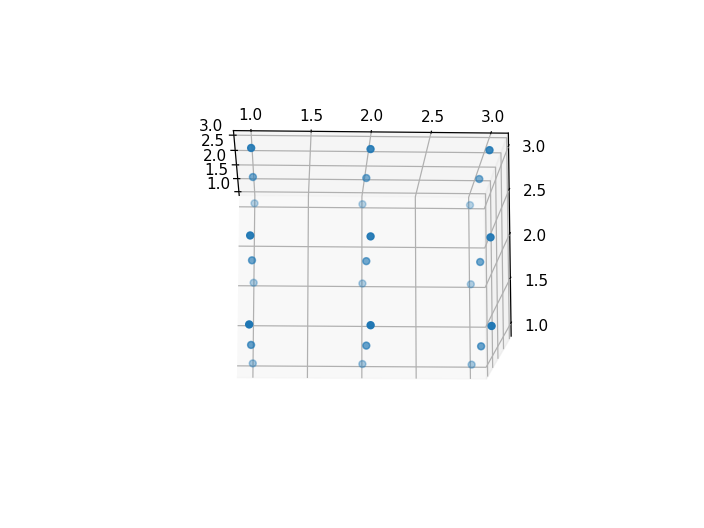

In [114]:
x = np.array([1,2,3])
y = np.array([1,2,3])
z = np.array([1,2,3])

x_, y_, z_= np.meshgrid(x, y, z)
x = np.ravel(x_)
y = np.ravel(y_)
z = np.ravel(z_)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)



# Кхе-кхем 

In [116]:
class AdaLineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01, size= 1 + X.shape[1])

        self.cost_ = []
        
        for i in  range(self.n_iter ):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors) 
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            
            self.cost_.append(cost)
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # w_[0] нейрон смещения
    def activation(self, X):
        return X
        #return 1.0 / (1.0 + np.exp(- X ))
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [153]:
rgen = np.random.RandomState(1)
X = np.zeros((20, 3))
y = np.ones(20)
X[:10, :] = 5 * rgen.random_sample((10, 3))
X[10:, :] = 5 * rgen.random_sample((10, 3)) + 5
y[10:] *= -1 

<IPython.core.display.Javascript object>


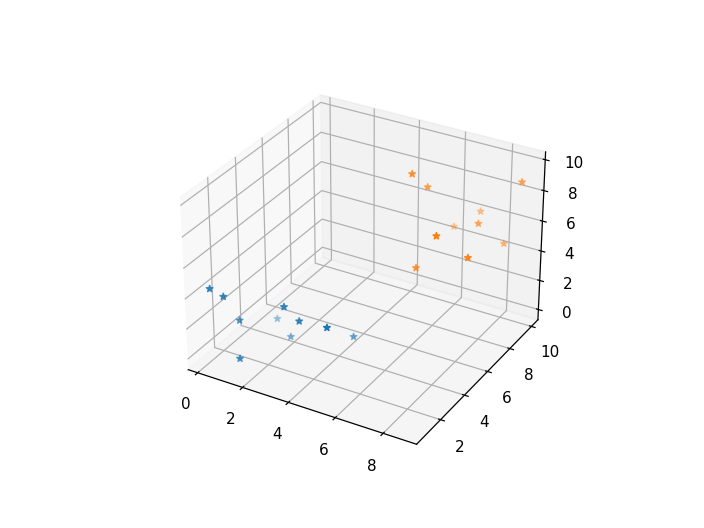

In [157]:
x1 = X[y == 1]
x2 = X[y == -1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2], marker='*')
ax.scatter(x2.T[0], x2.T[1],x2.T[2], marker='*')

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y )


In [160]:
ada = AdaLineGD( eta=0.001, n_iter=500, random_state=1)

<IPython.core.display.Javascript object>


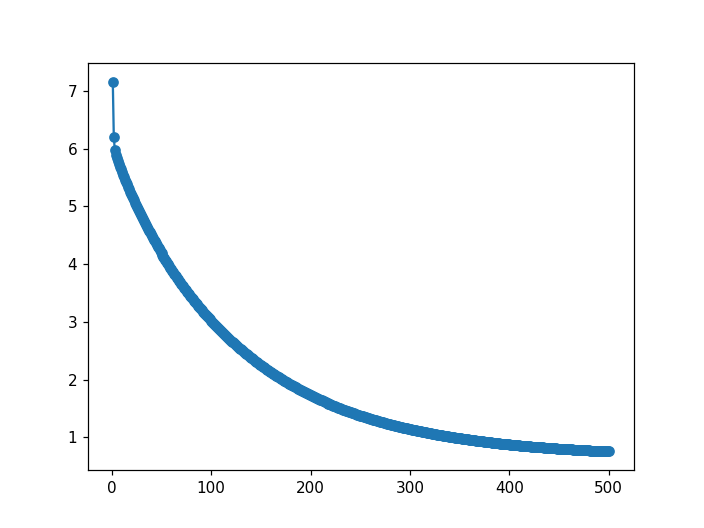

In [161]:
ada.fit(X_train, y_train)
plt.plot(range(1, len(ada.cost_)+ 1), ada.cost_, marker='o' )
plt.show()

<IPython.core.display.Javascript object>


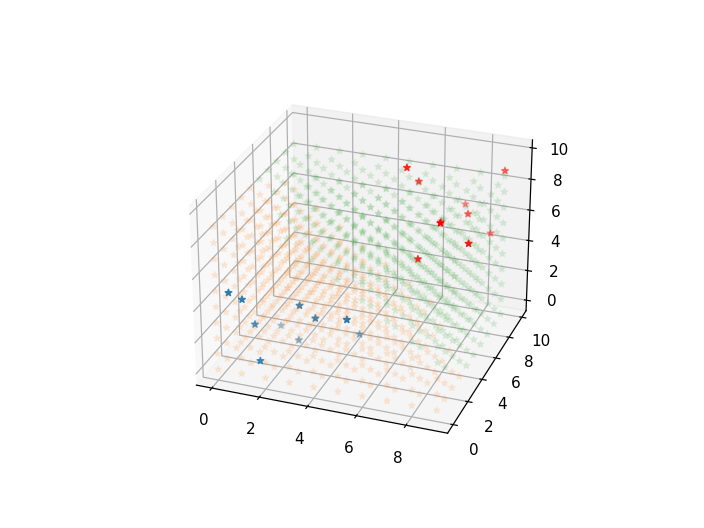

In [170]:
x_ = np.arange(0, 10, 1)
y_ = np.arange(0, 10, 1)
z_ = np.arange(0, 10, 1)

xx, yy, zz= np.meshgrid(x_, y_, z_)


all_dots = np.array([xx.ravel(), yy.ravel(), zz.ravel()]).T 
result = ada.predict(all_dots)

a = all_dots[result == 1]
b = all_dots[result == -1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2], marker='*')
ax.scatter(x2.T[0], x2.T[1],x2.T[2], marker='*', color='red')

ax.scatter( a.T[0], a.T[1], a.T[2], marker='*', alpha=0.1)
ax.scatter( b.T[0], b.T[1], b.T[2], marker='*', alpha=0.1)

1000